In [44]:
sim_log_data <- function(b1, b2, n, plot = TRUE, seed = TRUE) {
  if (seed) set.seed(666)
  x1 <- rnorm(n)
  z <- b1 + b2 * x1
  pz <- 1/(1 + exp(-z))
  y <- rbinom(n, 1, pz)
  if (plot) {
    plot(x1, y, pch = 21, col = 2)
    lines(sort(z), pz[order(z)], col = 'navy', lwd = 2)
  }
  list(y = y, x1 = x1, pz = pz)
}


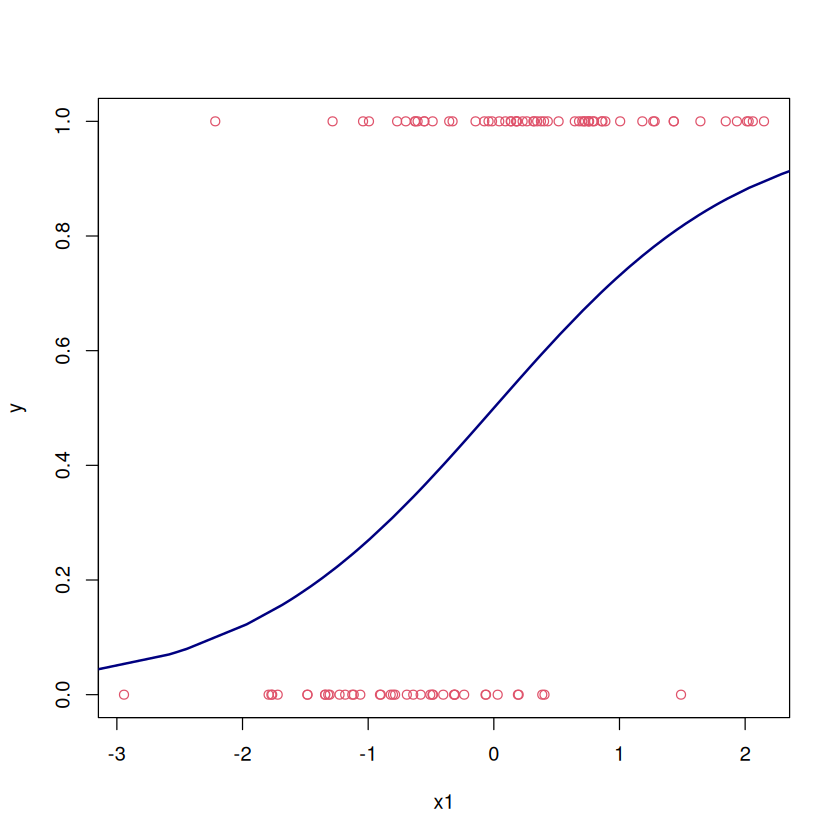

In [45]:
log_data <- sim_log_data(1, 2, 100)

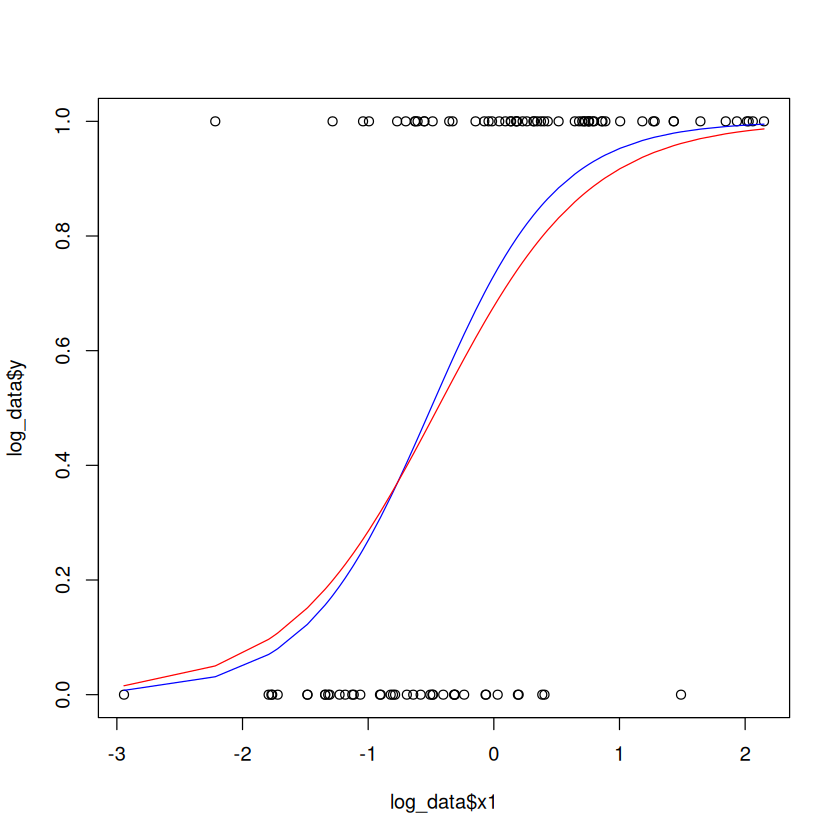

In [49]:
log_model <- glm(y~x1,
                 data=log_data,
                 family=binomial(link = 'logit'))

fit_vals <- fitted(log_model)
plot(log_data$x1, log_data$y)
lines(sort(log_data$x1), sort(log_data$pz), col='blue')
lines(sort(log_data$x1), sort(fit_vals), col = 'red')

In [50]:
summary(log_model)


Call:
glm(formula = y ~ x1, family = binomial(link = "logit"), data = log_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5511  -0.7616   0.3342   0.7572   2.4466  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.7405     0.2696   2.747  0.00602 ** 
x1            1.6610     0.3534   4.699 2.61e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 134.602  on 99  degrees of freedom
Residual deviance:  97.163  on 98  degrees of freedom
AIC: 101.16

Number of Fisher Scoring iterations: 5


$$
  p_i = \frac{1}{1 + \exp\{-(b_0 + b_1x_1)\}}
$$

In [55]:
coefs <- coef(log_model)
b0 <- coefs[1]
b1 <- coefs[2]

# predecir la probabilidad cuando el predictor vale 1
# 1 / (1 + exp(-(b0 + b1)))
log_model


Call:  glm(formula = y ~ x1, family = binomial(link = "logit"), data = log_data)

Coefficients:
(Intercept)           x1  
     0.7405       1.6610  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    134.6 
Residual Deviance: 97.16 	AIC: 101.2

In [68]:
# o lo que es lo mismo
p1=predict(log_model, newdata = data.frame(x1 = 1), type = 'response', se.fit = TRUE)
p1

$fit
        1 
0.9169402 

$se.fit
         1 
0.03954526 

$residual.scale
[1] 1

In [70]:
# stepwise
library(MASS)
stepAIC(log_model)

Start:  AIC=101.16
y ~ x1

       Df Deviance    AIC
<none>      97.163 101.16
- x1    1  134.602 136.60



Call:  glm(formula = y ~ x1, family = binomial(link = "logit"), data = log_data)

Coefficients:
(Intercept)           x1  
     0.7405       1.6610  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    134.6 
Residual Deviance: 97.16 	AIC: 101.2